# Modelo de Autômato Finito e Conversões: ε-AFN-AFN e AFN-AFD
---

# Sumário

1. [Conversão: ε-AFN-AFN](#eAFN-AFN)
2. [Modelo em JSON](#automato-json)

- **Símbolos usados**
    - Delta - **δ**
    - Epsilon - **ε**
    - Conjunto Vazio = $\emptyset$
---

# Conversão: ε-AFN-AFN <a id="eAFN-AFN"></a>


# Modelo em JSON <a id="automato-json"></a>

- Modelo ilustrado:

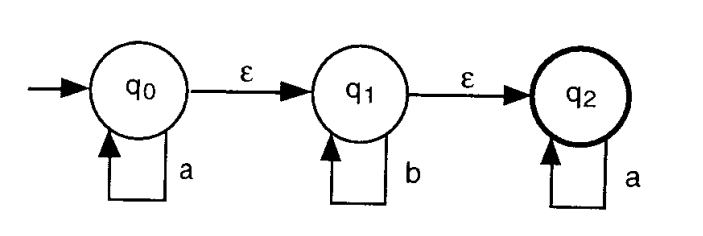 

  
- Modelo em formato **JSON**:
```json
{
  "estados": ["q0", "q1", "q2"],
  "alfabeto": ["a", "b"],
  "estado_inicial": "q0",
  "estados_finais": ["q2"],
  "transicoes": {
    "q0": {"a":["q0"], "b":[], "ε":["q1"]},
    "q1": {"a":[], "b":["q1"], "ε":["q2"]},
    "q2": {"a":["q2"], "b":[], "ε":[]},
  }
}
```

# Construção de um AFN a partir de um AFε

O Automato Finito com Movimentos Vazios **Mg = ({a,b}, {q0, q1, q2}, δg, q0, {q2})**, onde δg é como segue:

| $\delta_9$ | a | b | $\epsilon$ |
| :---: | :---: | :---: | :---: |
| $q_0$ | $\{q_0\}$ | - | $\{q_1\}$ |
| $q_1$ | - | $\{q_1\}$ | $\{q_2\}$ |
| $q_2$ | $\{q_2\}$ | - | - |

é representado pelo [grafo ilustrado](#automato-json). O correspondente AFN **Mg' = ({a,b}, {q0, q1, q2}, δg', q0, F')** construído conforme o algoritmo da demonstração do Teorema de Equivalência entre AFN e AFε. Também por simplicidade, **FECHO-ε** é abreviado para **Fε**.

F' = {q0, q1, q2}, pois:
- Fε(q0) = {q0, q1, q2}
- Fε(q1) = {q1, q2}
- Fε(q2) = {q2}

Na construção de δg' note-se que:
- δ9({q0}, ε) = {q0, q1, q2}
- δ9({q1}, ε) = {q1, q2}
- δ9({q2}, ε) = { q2}

Assim, δg' é tal que:

| $\delta_9$' | a | b | 
| :---: | :---: | :---: |
| $q_0$ | $\{q_0, q_1, q_2\}$ | $\{q_1, q_2\}$ |
| $q_1$ | $\{q_2\}$ | $\{q_1, q_2\}$ |
| $q_2$ | $\{q_2\}$ | $\emptyset$ |

Com base na construção, pode-se representar o modelo através do grafo abaixo:

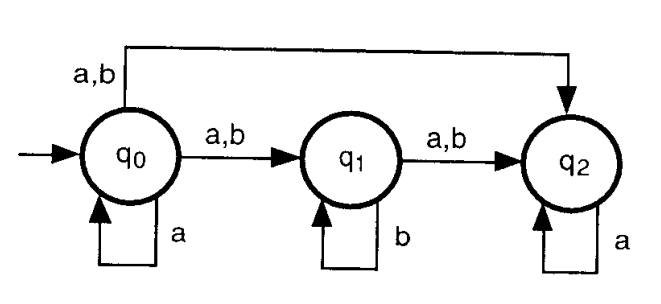

# Algoritmo em Python

### 1 - Carregar entrada (arquivo json):

In [1]:
import json
import pandas as pd

In [2]:
with open("../data/raw/eAFN.json", "r") as f:
    data = json.load(f)

In [3]:
df_transicoes = pd.DataFrame(data["transicoes"]).T
df_transicoes.columns = ["a","b","ε"]
df_transicoes

,a,b,ε
q0,[q0],[],[q1]
q1,[],[q1],[q2]
q2,[q2],[],[]


### 2 - Crianção do FECHO-ε para cada estado:

- Verificação de chamada isolada

In [4]:
df_transicoes.T["q0"]["ε"]

['q1']

In [5]:
df_transicoes.T["q1"]["ε"]

['q2']

In [6]:
df_transicoes.T["q2"]["ε"]

[]

- Criação da função FECHO-ε

In [12]:
def fechoEpsilon(estado, fechamento=None):
    
    if fechamento is None:
        fechamento = set()
    
    fechamento.add(estado)

    proximos_estados = df_transicoes.T[estado]["ε"]
    
    for s in proximos_estados:
        if s not in fechamento:
            fechoEpsilon(s, fechamento)
    
    return fechamento

A função **fechoEpsilon** em primeira chamada, verifica se o estado atual tem um conjunto definido, no nosso exemplo *q0* inicia com o conjunto de fechamento vazio - no literal - e logo após *q0* se junta ao conjunto de estados de fechamento.

Depois, procura os estados vazios desse estado atual (*q0*), e faz todo o mapeamento desses possíveis estados, assim, para cada possível estado próximo será feito a verificação recursivamente, e para evitar *loops*, o conjunto de fechamento será passado adiante, portanto todos os estados serão verificados somente uma vez.

- Gerando estados de fechamento (F'):

In [13]:
estado_inicial = data["estado_inicial"]
estado_inicial

'q0'

In [15]:
fechoEpsilon(estado_inicial)

{'q0', 'q1', 'q2'}